## Random Forest Regression
- 시도1

In [0]:
import pandas as pd 
df = pd.read_csv('df_grouped_rate.csv') #폴더 위치는 상이할 수 있음


In [0]:
y=df.iloc[:,3:4]
# y

In [0]:
X= df.iloc[:,1:].drop(['sales_total','code'],axis=1)
# X

In [0]:
# 더미변수화
X_dum1 = pd.get_dummies(X.iloc[:,0])  #district는 범주형으로 인식 안해서 따로 실시
X_dum2 = pd.get_dummies(X.iloc[:,1:])
X = pd.concat([X_dum1, X_dum2],axis=1)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # y 값이 정의되지 않아 df.sales_total 으로 대체하겠습니다.

Xs_train = X_train
Xs_test = X_test

In [27]:
Xs_test.columns

Index([                   1000001,                    1000002,
                          1000003,                    1000004,
                          1000005,                    1000006,
                          1000007,                    1000008,
                          1000009,                    1000010,
       ...
                'b_apt_avg_price', 'b_income_avg_monthly_inc',
                  'sales_weekday',             'sales_female',
                    'sales_2030s',              'sales_06_11',
                    'sales_11_14',              'sales_14_17',
                    'sales_17_21',              'sales_21_24'],
      dtype='object', length=1024)

In [28]:

from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=50,max_depth=20, random_state=0,n_jobs=-1)
model=regr.fit(Xs_train, y_train)
y_pred=regr.predict(Xs_test)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [29]:
import numpy as np
# 정확도 결과값 
print(model.score(Xs_train, y_train))
print(model.score(Xs_test, y_test))
# 오차 결과값

from sklearn import metrics
y_pred = model.predict(Xs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.869802188449452
0.6621879867968113
Mean Absolute Error: 479049182.5763225
Mean Squared Error: 9.116769554355263e+17
Root Mean Squared Error: 954817760.3268209


In [0]:
import pandas as pd 
df = pd.read_csv('df_grouped_rate.csv') #폴더 위치는 상이할 수 있음

y=df.sort_values('sales_female')['sales_total']
X =df.sort_values('sales_female').drop(['year','code','sales_total'],axis=1)
X['district'] = X['district'].astype('object')
X_dum = pd.get_dummies(X)
y_pred = model.predict(X_dum)

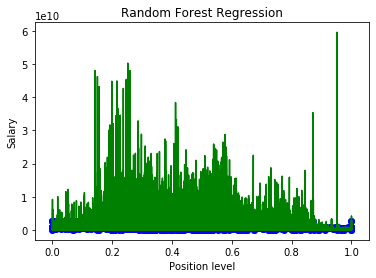

In [61]:
import matplotlib.pyplot as plt

# Visualising the Random Forest Regression results 
  
# arange for creating a range of values 
# from min value of x to max  
# value of x with a difference of 0.01  
# between two consecutive values 
# X_grid = np.arange(min(X.sales_female), max(X.sales_female), 0.01)  
  
# reshape for reshaping the data into a len(X_grid)*1 array,  
# i.e. to make a column out of the X_grid value                   
X_grid = np.array(X['sales_female']).reshape((X.shape[0], 1)) 
  
# Scatter plot for original data 
plt.scatter(X_grid, y_pred, color = 'blue')   
  
# plot predicted data 
plt.plot(X_grid, y,  
         color = 'green')  
plt.title('Random Forest Regression') 
plt.xlabel('Position level') 
plt.ylabel('Salary') 
plt.show()

In [37]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os


dot_data = StringIO()
export_graphviz(model.decision_path.indicatior, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

AttributeError: ignored

In [0]:
plot_forest(20)

In [0]:
from sklearn.metrics import r2_score
print("R-Squared score:", r2_score(y_test , y_pred))

R-Squared score: 0.7151252214520722


In [0]:
yy_test=np.array(y_test).reshape(-1,)

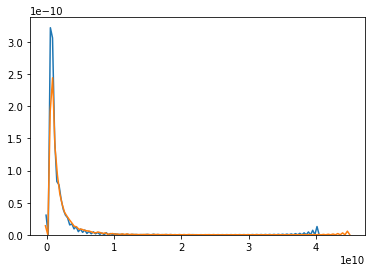

In [0]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(y_pred)
sns.kdeplot(yy_test)
plt.show()

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(scores.mean())
scores
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

0.6440405968049462


array([0.72461305, 0.78218288, 0.80032656, 0.7133037 , 0.19977679])

- 시도2

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) # y 값이 정의되지 않아 df.sales_total 으로 대체하겠습니다.

Xs_train = X_train
Xs_test = X_test

In [0]:

from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=100,max_depth=20, random_state=0,n_jobs=-1)
model=regr.fit(Xs_train, y_train)
y_pred=regr.predict(Xs_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [0]:
import numpy as np
# 정확도 결과값 
print(model.score(Xs_train, y_train))
print(model.score(Xs_test, y_test))
# 오차 결과값

from sklearn import metrics
y_pred = model.predict(Xs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.888042757538823
0.6840583239471396
Mean Absolute Error: 453233897.6258399
Mean Squared Error: 9.05561715199091e+17
Root Mean Squared Error: 951610064.6793785


In [0]:
from sklearn.metrics import r2_score
print("R-Squared score:", r2_score(y_test , y_pred))

R-Squared score: 0.6840583239471396


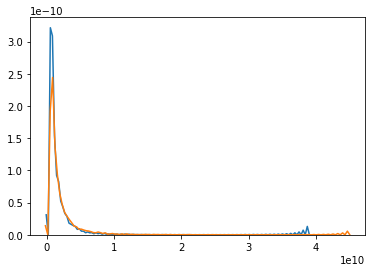

In [0]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(y_pred)
sns.kdeplot(yy_test)
plt.show()

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(scores.mean())
scores
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

0.6496768044200645


array([0.72817725, 0.78707428, 0.80317068, 0.71905445, 0.21090737])